以洗衣机洗衣粉投放量控制为例，令污渍stain和油渍oil为输入变量，洗衣粉powder为输出。假定输入和输出范围均为1~10。步骤如下：

## 引用相关模块并设置各个变量范围：

In [ ]:
import numpy as np

#创建n行m列的矩阵
def nRowmLine(n,m):
    matrix = [None] * n
    for i in range(len(matrix)):
        matrix[i] = [0] * m
    matrix = np.array(matrix)
    return matrix

In [7]:
nRowmLine(5,4)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [8]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

x_stain_range=np.arange(1,11,1,np.float32)
x_oil_range=np.arange(1,11,1,np.float32)
y_powder_range=np.arange(1,11,1,np.float32)

## 定义输入输出模糊集和其隶属度函数（使用三角函数），同时定义输出解模糊规则。模糊集如下：

污渍（小）=N，污渍（中）=M，污渍（大）=P

油渍（小）=N，油渍（中）=M，油渍（大）=P

洗衣粉（小）=N，洗衣粉（中）=M，洗衣粉（大）=P

In [9]:
# 创建模糊控制变量

x_stain=ctrl.Antecedent(x_stain_range, 'stain')

x_oil=ctrl.Antecedent(x_oil_range, 'oil')

y_powder=ctrl.Consequent(y_powder_range, 'powder')

In [10]:
# 定义模糊集和其隶属度函数

x_stain['N']=fuzz.trimf(x_stain_range,[1,1,5])

x_stain['M']=fuzz.trimf(x_stain_range,[1,5,10])

x_stain['P']=fuzz.trimf(x_stain_range,[5,10,10])

x_oil['N']=fuzz.trimf(x_oil_range,[1,1,5])
x_oil['M']=fuzz.trimf(x_oil_range,[1,5,10])
x_oil['P']=fuzz.trimf(x_oil_range,[5,10,10])
y_powder['N']=fuzz.trimf(y_powder_range,[1,1,5])
y_powder['M']=fuzz.trimf(y_powder_range,[1,5,10])
y_powder['P']=fuzz.trimf(y_powder_range,[5,10,10])

In [11]:
# 设定输出powder的解模糊方法——质心解模糊方式

y_powder.defuzzify_method='centroid'

## 建立模糊控制规则，并初始化控制系统和运行环境。规则如下表所示

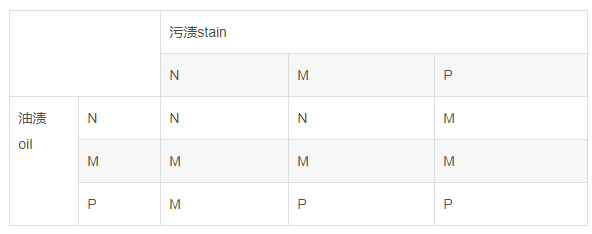

In [12]:
# 输出为N的规则

rule0 = ctrl.Rule(antecedent=((x_stain['N'] & x_oil['N']) |

                              (x_stain['M'] & x_oil['N']) ),

                  consequent=y_powder['N'], label='rule N')

In [13]:
# 输出为M的规则

rule1 = ctrl.Rule(antecedent=((x_stain['P'] & x_oil['N']) |

                              (x_stain['N'] & x_oil['M']) |

                              (x_stain['M'] & x_oil['M']) |

                              (x_stain['P'] & x_oil['M']) |

                              (x_stain['N'] & x_oil['P']) ),

                  consequent=y_powder['M'], label='rule M')

In [14]:
# 输出为P的规则

rule2 = ctrl.Rule(antecedent=((x_stain['M'] & x_oil['P']) |

                              (x_stain['P'] & x_oil['P']) ),

                  consequent=y_powder['P'], label='rule P')

In [15]:
# 环境初始化

system = ctrl.ControlSystem(rules=[rule0, rule1, rule2])

sim = ctrl.ControlSystemSimulation(system)

## 系统建立完成后，通过输入变量值来查看系统的输出

令输入污渍为4，油渍为7

In [18]:
sim.input['stain'] = 5

sim.input['oil'] = 6

sim.compute()   # 运行系统

output_powder = sim.output['powder']

 

# 打印输出结果

print(output_powder)

5.442232292741621
